In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read wine clasification data

In [2]:
white=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
               sep=";")
print(white[:3])
print(white.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [3]:
white[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


# basic decision tree on wine quality

In [4]:
Y=np.array(white["quality"])
X=np.array(white)[:,:-1]

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, \
   BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)

/home/mathman/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [6]:
def clf_test(clf, X, Y, nruns):
    accs=[]
    for j in range(nruns):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
        clf.fit(XTRAIN, YTRAIN)
        YP=clf.predict(XTEST)
        acc=accuracy_score(YTEST,YP)
        accs.append(acc) 
    return(np.mean(accs), np.std(accs))

In [7]:
DT=DecisionTreeClassifier(max_depth=1)
truncDTacc, sigmatrunc=clf_test(DT,X,Y,25)
print(truncDTacc, sigmatrunc)

0.4509714285714286 0.019938537796506638


In [8]:
DT=DecisionTreeClassifier(max_depth=None)
meanDTacc,sigmafull=clf_test(DT,X,Y,25)
print(meanDTacc,sigmafull)

0.5986938775510204 0.013809195398393802


In [9]:
DT=DecisionTreeClassifier(max_depth=3)
DT.fit(XTRAIN,YTRAIN)
YP=DT.predict(XTEST)
confusion_matrix(YP,YTEST)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,  27, 161,  83,   5,   0,   0],
       [  4,  19, 220, 450, 171,  27,   1],
       [  0,   0,   1,  19,  29,   8,   0],
       [  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

## Boosting

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
GB=GradientBoostingClassifier()
GB.fit(XTRAIN,YTRAIN)
GP=GB.predict(XTEST)
print(accuracy_score(YTEST,GP))
confusion_matrix(YTEST,GP)

0.6212244897959184


array([[  0,   0,   1,   3,   0,   0,   0],
       [  2,  11,  22,  11,   0,   0,   0],
       [  2,   7, 216, 152,   5,   0,   0],
       [  2,   2,  67, 427,  51,   3,   0],
       [  0,   0,   3, 107,  94,   1,   0],
       [  0,   0,   0,  12,  10,  13,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

In [12]:
def multi_score(clf, X, Y, repeats, treelist):
    results=[]
    for ntrees in treelist:
        classifier=clf(n_estimators=ntrees)
        mu,sigma=clf_test(classifier,X,Y,repeats)
        results.append([mu,sigma])
        print(ntrees,mu,sigma)
    mus=np.array(results).T[0]
    sigs=np.array(results).T[1]
    return(mus,sigs)

In [13]:
maxtrees=[2,3,4,5, 7,10,20,30,40,50,70,100,300,500] #
gboostscores, gboostsigmas=multi_score(GradientBoostingClassifier,X,Y,25,maxtrees)
print(gboostscores)
print(gboostsigmas)

2 0.5253551020408164 0.016264502579183646
3 0.5308408163265306 0.01275251500294974
4 0.5378612244897958 0.01164190394781695
5 0.5395265306122449 0.014383886583702323
7 0.5398857142857143 0.01490797315108773
10 0.5443265306122449 0.013187148085752609
20 0.5588571428571428 0.011325482576995657
30 0.5694367346938776 0.012665600107080205
40 0.5728979591836735 0.015100055026640793
50 0.5762612244897959 0.010883613580275833
70 0.5845551020408163 0.011488867182531927
100 0.5956571428571429 0.013397149516234785
300 0.6284408163265307 0.01648200260372622
500 0.6432979591836735 0.009837950640402647
[0.5253551  0.53084082 0.53786122 0.53952653 0.53988571 0.54432653
 0.55885714 0.56943673 0.57289796 0.57626122 0.5845551  0.59565714
 0.62844082 0.64329796]
[0.0162645  0.01275252 0.0116419  0.01438389 0.01490797 0.01318715
 0.01132548 0.0126656  0.01510006 0.01088361 0.01148887 0.01339715
 0.016482   0.00983795]


## Bagging

In [14]:
from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier()
BC.fit(XTRAIN,YTRAIN)
YP=BC.predict(XTEST)
print(accuracy_score(YTEST,YP))
confusion_matrix(YTEST,YP)

0.6563265306122449


array([[  0,   0,   0,   3,   0,   1,   0],
       [  0,  13,  21,  12,   0,   0,   0],
       [  0,   9, 260, 103,  10,   0,   0],
       [  0,   1,  89, 396,  64,   2,   0],
       [  0,   0,   5,  77, 119,   4,   0],
       [  0,   0,   1,   8,  10,  16,   0],
       [  0,   0,   1,   0,   0,   0,   0]])

In [15]:
from sklearn.ensemble import BaggingClassifier
bagscores, bagsigmas=multi_score(BaggingClassifier,X,Y,10,maxtrees)
print(bagscores)
print(bagsigmas)

2 0.5469387755102042 0.015523088096659244
3 0.5842448979591837 0.009257661145193033
4 0.608326530612245 0.015453386802956808
5 0.6202448979591837 0.014091035015394758
7 0.6365714285714286 0.007794101722305328
10 0.6433469387755102 0.008084930269296832
20 0.6591020408163265 0.014612928954459172
30 0.6613061224489797 0.013710640915083956
40 0.6648163265306123 0.008663836187050841
50 0.6642448979591837 0.008935326890433316
70 0.6724081632653062 0.011139492651961631
100 0.6769795918367347 0.010909800186451098
300 0.671265306122449 0.008860433884959435
500 0.6755102040816328 0.008959160429517521
[0.54693878 0.5842449  0.60832653 0.6202449  0.63657143 0.64334694
 0.65910204 0.66130612 0.66481633 0.6642449  0.67240816 0.67697959
 0.67126531 0.6755102 ]
[0.01552309 0.00925766 0.01545339 0.01409104 0.0077941  0.00808493
 0.01461293 0.01371064 0.00866384 0.00893533 0.01113949 0.0109098
 0.00886043 0.00895916]


In [16]:
#from sklearn.ensemble import BaggingClassifier
BC=BaggingClassifier()
BC.fit(XTRAIN,YTRAIN)
YP=BC.predict(XTEST)
acc=accuracy_score(YP,YTEST)
print(acc)
print(confusion_matrix(YP,YTEST))

0.643265306122449
[[  0   0   0   0   0   0   0]
 [  0  14   8   4   0   0   0]
 [  1  26 251  87   5   0   1]
 [  2   6 110 393  82  10   0]
 [  1   0  13  67 115  10   0]
 [  0   0   0   1   3  15   0]
 [  0   0   0   0   0   0   0]]


## Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier
RFScores, RFSigmas=multi_score(RandomForestClassifier,X,Y,10,maxtrees)
print(RFScores, RFSigmas)

2 0.5508571428571429 0.017621311545249988
3 0.5815510204081633 0.014789710168350399
4 0.6046530612244898 0.009590012853082235
5 0.6212244897959184 0.01188028582022947
7 0.6267755102040816 0.01339273177783889
10 0.6529795918367347 0.011949916308985337
20 0.6697142857142857 0.012142153984099938
30 0.6707755102040817 0.012855782240931084
40 0.6735510204081633 0.010296398726683935
50 0.6746122448979592 0.008508613368682702
70 0.6782857142857143 0.014458200678063185
100 0.6751020408163265 0.008428349060663068
300 0.6813061224489796 0.011649182670598007
500 0.6768163265306122 0.00957888835099442
[0.55085714 0.58155102 0.60465306 0.62122449 0.62677551 0.65297959
 0.66971429 0.67077551 0.67355102 0.67461224 0.67828571 0.67510204
 0.68130612 0.67681633] [0.01762131 0.01478971 0.00959001 0.01188029 0.01339273 0.01194992
 0.01214215 0.01285578 0.0102964  0.00850861 0.0144582  0.00842835
 0.01164918 0.00957889]


In [18]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(XTRAIN,YTRAIN)
YP=RF.predict(XTEST)
acc=accuracy_score(YP,YTEST)
print(acc)
print(confusion_matrix(YP,YTEST))

0.64
[[  0   0   0   0   0   0   0]
 [  0  11   6   1   0   0   0]
 [  1  20 244  91   8   0   0]
 [  3  13 124 397  79  10   1]
 [  0   2   8  61 116   9   0]
 [  0   0   0   2   2  16   0]
 [  0   0   0   0   0   0   0]]


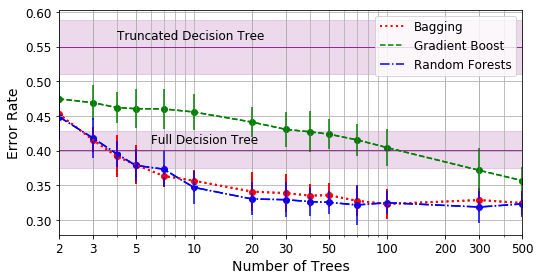

In [19]:
plt.plot(maxtrees, 1-bagscores, label="Bagging",ls=":",  lw=2, color="red")
plt.scatter(maxtrees, 1-bagscores, color="red")
plt.errorbar(maxtrees, 1-bagscores, yerr=1.96*bagsigmas, color="red", ls=":", lw=2)

plt.plot(maxtrees, 1-gboostscores, label="Gradient Boost",ls="--",color="green")
plt.scatter(maxtrees, 1-gboostscores, color="green")
plt.errorbar(maxtrees,1-gboostscores,yerr=1.96*gboostsigmas,color="green",
            ls="--")

plt.plot(maxtrees, 1-RFScores, label="Random Forests",ls="-.", color="blue")
plt.scatter(maxtrees,1-RFScores, color="blue")
plt.errorbar(maxtrees, 1-RFScores, yerr=1.96*RFSigmas, color="blue",ls="-.")


plt.plot([1,500],[1-meanDTacc,1-meanDTacc], # label="Full Decision Tree",
         lw=.75, color="purple")
plt.fill_between([1,500],[1-meanDTacc-1.96*sigmafull,1-meanDTacc-1.96*sigmafull],
               [1-meanDTacc+1.96*sigmafull, 1-meanDTacc+1.96*sigmafull], 
                 color="purple", alpha=.15)

plt.plot([1,500],[1-truncDTacc,1-truncDTacc], # label="Truncated Decision Tree",
         lw=.75, color="purple")
plt.fill_between([1,500],[1-truncDTacc-1.96*sigmatrunc,1-truncDTacc-1.96*sigmatrunc],
               [1-truncDTacc+1.96*sigmatrunc, 1-truncDTacc+1.96*sigmatrunc], 
                 color="purple", alpha=.15)



truncDTacc
ax=plt.gca()
plt.legend(fontsize=12)#, ncol=2)
plt.xscale("log")
plt.xticks([1,2,3,5,10,20, 30, 50, 100,200, 300, 500],
           ["1","2","3","5","10","20","30", "50","100","200","300", "500"]);
plt.xlim([2,500])
plt.xlabel("Number of Trees",fontsize=14)
plt.ylabel("Error Rate",fontsize=14)
plt.grid(which="both")
ax=plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.text(4,.56,"Truncated Decision Tree", fontsize=12)
plt.text(6,.41,"Full Decision Tree", fontsize=12)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(8,4)
fig.savefig("white-wine-ensemble-error-vs-number-of-trees.pdf")